In [1]:
%load_ext autoreload

In [2]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..")
METRICS_PATH = os.path.join(BASE_PATH, "metrics")
MODULES_PATH = os.path.join(BASE_PATH, "modules")

In [4]:
sys.path.append(MODULES_PATH)

In [5]:
%autoreload 2
from active_learning import ExperimentSuitMetrics
from utils import MetricsTransformer, plot_in_steps

In [6]:
temp = "28_07_2021_y_gal_mc_mean"
experiment_path = os.path.join(METRICS_PATH, "mnist_seed_runs", "21_08_21_seed_20432")
metrics_handler = ExperimentSuitMetrics(experiment_path)
metrics = MetricsTransformer()

In [7]:
dtypes = {
    "query_time": float,
    "eval_loss": float,
    "eval_accuracy": float,
    "eval_time": float, 
    "iteration": int,
    "labeled_pool_size": int
}

In [8]:
df_mc_dropout = metrics.load_from_dir(metrics_handler, "0_mc_dropout", dtype=dtypes)
# df_mp = metrics.load_from_dir(metrics_handler, "moment_propagation", dtype=dtypes)

Text(650.4352941176471, 0.5, 'Eval Loss')

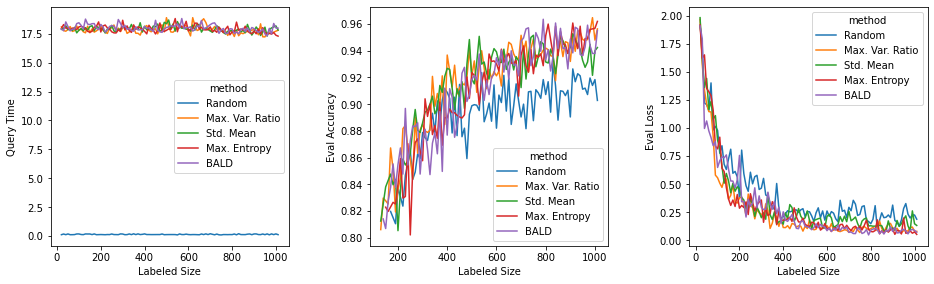

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5))
plt.tight_layout(pad=5)

sns.lineplot(ax=ax[0], data=df_mc_dropout, y="query_time", x="labeled_pool_size", hue="method")
ax[0].set_xlabel("Labeled Size")
ax[0].set_ylabel("Query Time")

acc_filter = df_mc_dropout["eval_accuracy"] > .8
sns.lineplot(ax=ax[1], data=df_mc_dropout[acc_filter], y="eval_accuracy", x="labeled_pool_size", hue="method")
ax[1].set_xlabel("Labeled Size")
ax[1].set_ylabel("Eval Accuracy")

sns.lineplot(ax=ax[2], data=df_mc_dropout, y="eval_loss", x="labeled_pool_size", hue="method")
ax[2].set_xlabel("Labeled Size")
ax[2].set_ylabel("Eval Loss")


In [10]:
df_mc_random = metrics.load_from_dir(metrics_handler, "random", dtype=dtypes)
df_mc_entropy = metrics.load_from_dir(metrics_handler, "mc_dropout_max_entropy", dtype=dtypes)
df_mc_bald = metrics.load_from_dir(metrics_handler, "mc_dropout_bald", dtype=dtypes)
df_mc_var_ratio = metrics.load_from_dir(metrics_handler, "mc_dropout_max_var_ratio", dtype=dtypes)
df_mc_std = metrics.load_from_dir(metrics_handler, "std_mean", dtype=dtypes)

In [11]:
dtypes = {
    "eval_accuracy": float,
    "eval_loss": float,
    "query_time": float,
    "labeled_pool_size": int
}
columns = ["iteration"] + list(dtypes.keys())
df_mc_random_mean = MetricsTransformer.mean(df_mc_random, columns, dtype=dtypes)
df_mc_entropy_mean = MetricsTransformer.mean(df_mc_entropy, columns, dtype=dtypes)
df_mc_bald_mean = MetricsTransformer.mean(df_mc_bald, columns, dtype=dtypes)
df_mc_var_ratio_mean = MetricsTransformer.mean(df_mc_var_ratio, columns, dtype=dtypes)
df_mc_std_mean = MetricsTransformer.mean(df_mc_std, columns, dtype=dtypes)

In [12]:
df_mc_random_mean.insert(0, "method", "Random")
df_mc_entropy_mean.insert(0, "method", "Max. Entropy")
df_mc_bald_mean.insert(0, "method", "BALD")
df_mc_var_ratio_mean.insert(0, "method", "Max. Var. Ratio")
df_mc_std_mean.insert(0, "method", "Std. Mean")

In [19]:
df_mc_mean = pd.concat([
    df_mc_random_mean,
    df_mc_entropy_mean,
    df_mc_var_ratio_mean,
    df_mc_std_mean
])

<AxesSubplot:xlabel='labeled_pool_size', ylabel='eval_accuracy'>

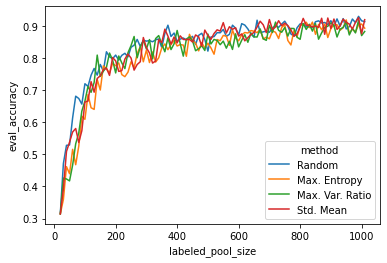

In [20]:
sns.lineplot(data=df_mc_mean, y="eval_accuracy", x="labeled_pool_size", hue="method")

In [21]:
random_selector = df_mc_dropout["method"] == "Random"
max_entropy_selector = df_mc_dropout["method"] == "Max. Entropy"

In [22]:
loss_random = MetricsTransformer.list_to_series(df_mc_dropout[random_selector], "train_loss")
loss_max_entropy = MetricsTransformer.list_to_series(df_mc_dropout[max_entropy_selector], "train_loss")

In [23]:
loss_max_entropy

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,40.226063,43.674038,4.544465e+01,51.031246,56.863564,42.555897,33.406830,49.856445,36.649181,44.466522,...,8.341652,8.432176,4.822397,7.688385,6.850426,7.640501,6.006345,5.858679,7.887739,7.863346
1,46.729469,32.044144,2.033168e+01,16.780289,19.084475,13.656464,8.879068,5.421758,3.804947,5.539372,...,1.991176,1.895328,1.987507,2.013405,1.935192,1.761241,1.882016,1.864511,2.042725,1.826036
2,11.185848,18.309254,7.603934e+00,6.628691,3.257334,3.248489,1.679037,1.732485,1.815049,1.869054,...,1.616965,1.558590,1.676693,1.723455,1.560591,1.318992,1.507757,1.504931,1.742991,1.480647
3,9.022013,11.097677,3.889721e+00,3.828255,1.203759,1.536187,1.250095,1.361158,1.512916,1.496844,...,1.340576,1.227043,1.346011,1.529624,1.183736,1.030213,1.279385,1.073599,1.489947,1.139742
4,4.249416,5.740545,2.069932e+00,1.109937,1.100598,1.110724,1.000553,1.162723,1.194271,1.053828,...,1.092620,0.937322,1.165148,1.242120,0.963347,0.834162,1.032391,0.883360,1.304549,0.965072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.000689,0.000388,7.262621e-04,0.001019,0.015442,0.000154,0.056333,0.043479,0.017937,0.035169,...,0.035051,0.063156,0.040479,0.044316,0.038032,0.043929,0.073411,0.074567,0.100283,0.070120
196,0.056453,0.002628,8.999207e-06,0.000805,0.009398,0.036036,0.031482,0.006251,0.115622,0.081176,...,0.084355,0.033077,0.057646,0.078282,0.046287,0.104928,0.047853,0.027307,0.047602,0.100545
197,0.032443,0.003389,1.311301e-07,0.000025,0.003416,0.057573,0.047152,0.011389,0.014459,0.001818,...,0.053155,0.045418,0.044803,0.074785,0.079436,0.048143,0.043150,0.043842,0.061959,0.034422
198,0.011538,0.020992,8.534575e-06,0.000046,0.014732,0.002880,0.037996,0.026528,0.008474,0.021500,...,0.082804,0.068574,0.071982,0.057416,0.039901,0.052211,0.045933,0.133801,0.043137,0.070829


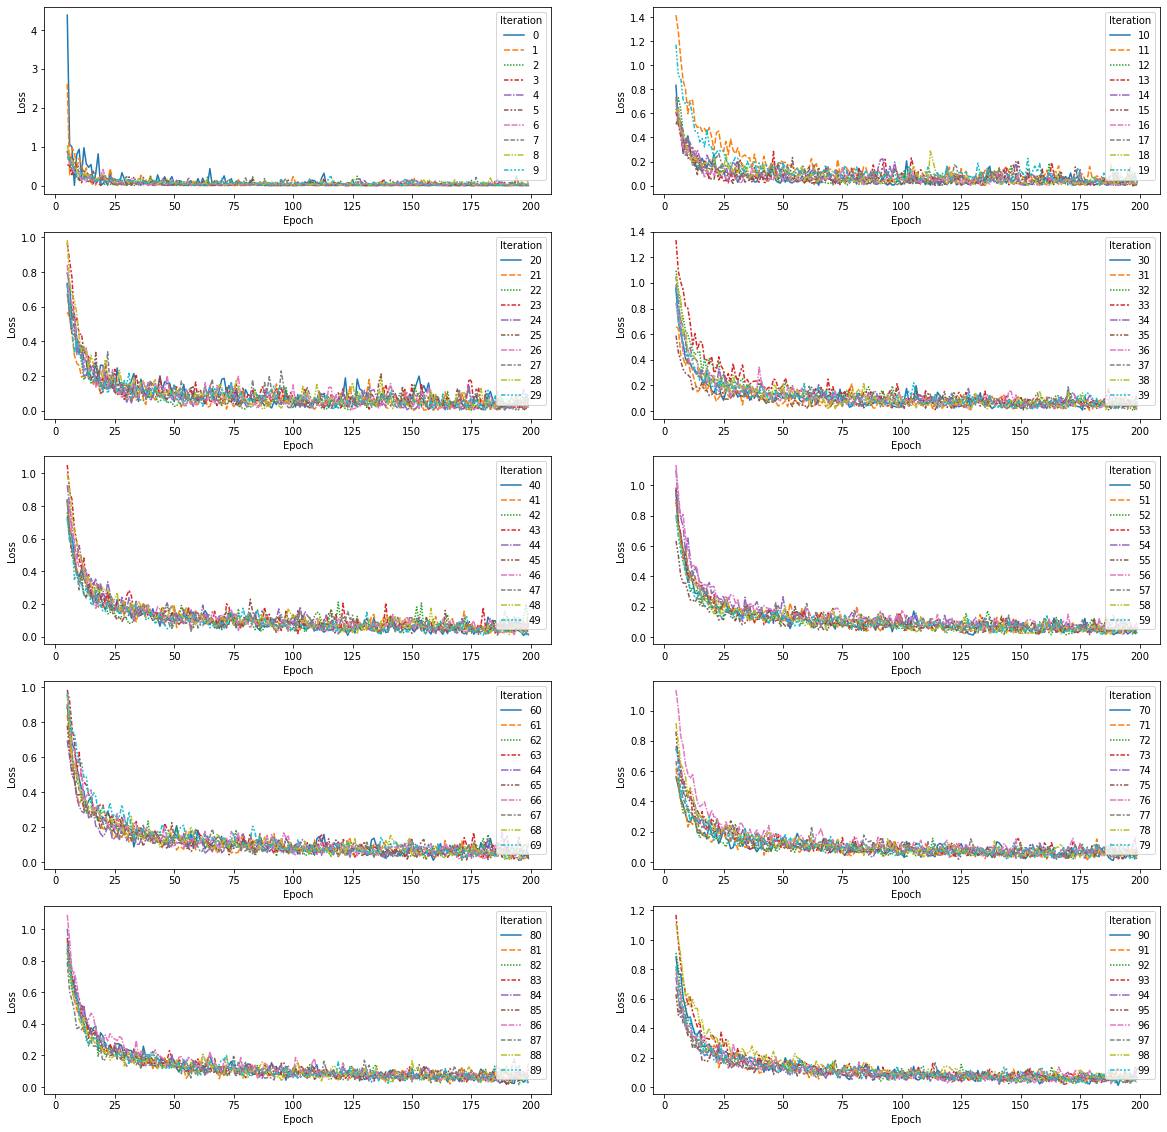

In [24]:
plot_in_steps(loss_max_entropy, 10, 10, num_columns=2, from_epoch=5, figsize=(20, 20))

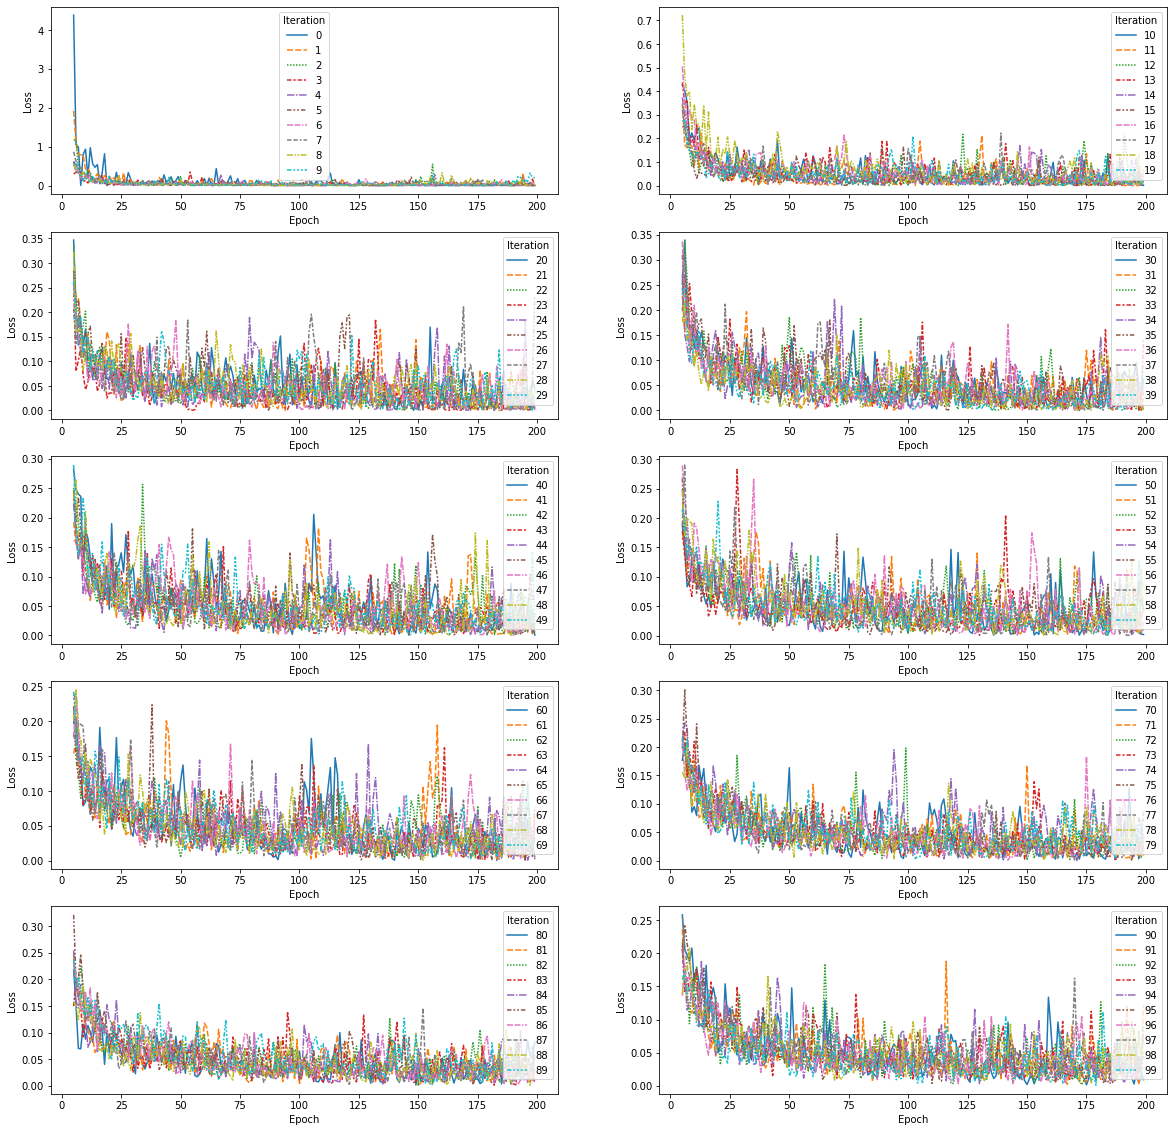

In [25]:
plot_in_steps(loss_random, 10, 10, num_columns=2, from_epoch=5, figsize=(20, 20))